In [108]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import json
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16


Selecting Language

In [109]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


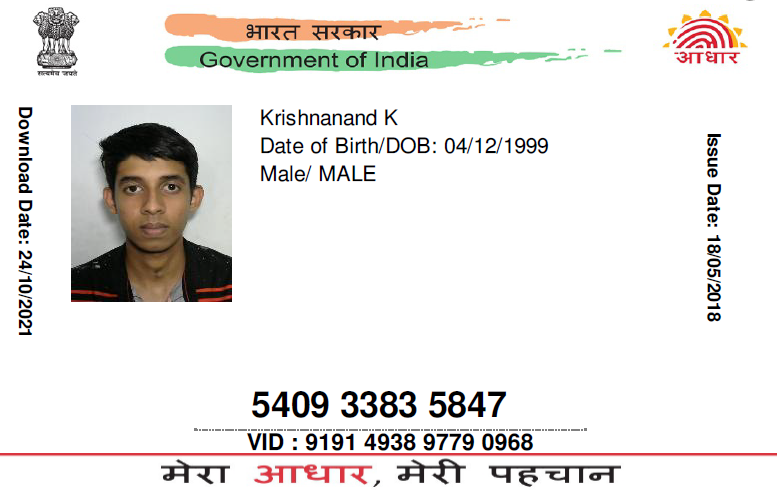

In [110]:
Image("test2.png")

In [111]:
output = reader.readtext('test2.png')

In [112]:
output

[([[241, 19], [302, 19], [302, 45], [241, 45]], 'HRT', 0.33264032006263733),
 ([[309, 23], [383, 23], [383, 43], [309, 43]], 'TTT', 0.356732964889354),
 ([[195, 47], [432, 47], [432, 73], [195, 73]],
  'Government of India',
  0.9956795287623378),
 ([[675, 51], [741, 51], [741, 67], [675, 67]], '3T&r?', 0.14115725240172028),
 ([[256, 104], [400, 104], [400, 130], [256, 130]],
  'Krishnanand K',
  0.9424327062014617),
 ([[15, 103], [35, 103], [35, 197], [15, 197]], '[', 0.9010051461277868),
 ([[258, 131], [552, 131], [552, 158], [258, 158]],
  'Date of Birth/DOB: 04/12/1999',
  0.862842623170106),
 ([[705, 135], [721, 135], [721, 181], [705, 181]], '1', 0.8719893082225241),
 ([[258, 162], [380, 162], [380, 186], [258, 186]],
  'Malel MALE',
  0.6714857111474517),
 ([[15, 197], [35, 197], [35, 247], [15, 247]], '1', 0.16798623343998376),
 ([[705, 183], [723, 183], [723, 229], [705, 229]], '8', 0.10960871040508469),
 ([[15, 247], [34, 247], [34, 339], [15, 339]], 'I', 0.21452274212839484)

In [113]:
name = output[4][-2]
dob = output[6][-2][19:]
gender = output[8][-2][6:]
adhaarNo = output[13][-2]
nadhaar = []

In [114]:
for i in adhaarNo:
    if(i.isnumeric()==True):
        nadhaar.append(i)
adhaarstr = ''.join(nadhaar)
#print(''.join(nadhaar))        


In [115]:
name

'Krishnanand K'

In [116]:
dob

'04/12/1999'

In [117]:
gender

'MALE'

In [118]:
thisdict = {
  "Name": name ,
  "DoB": dob,
  "Gender": gender,
  "Adhaar No": adhaarstr
}

In [119]:
print(thisdict)

{'Name': 'Krishnanand K', 'DoB': '04/12/1999', 'Gender': 'MALE', 'Adhaar No': '540933835847'}


Serializing json

In [120]:
json_object = json.dumps(thisdict, indent = 0) 
print(json_object)

{
"Name": "Krishnanand K",
"DoB": "04/12/1999",
"Gender": "MALE",
"Adhaar No": "540933835847"
}


In [122]:
with open("output.json", "w") as outfile:
    outfile.write(json_object)